# 先將要使用的庫import

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

# 查看GPU是否有讀到

In [4]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:1', device_type='XLA_GPU')]

In [5]:
tf.test.is_built_with_cuda()

True

# 將要訓練的內容使用pandas套件讀進來

In [6]:
data = pd.read_excel('四季白菜_作業125.xlsx')
print(data.shape)
print(data.info())
data.head(5)

(115, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   天數          115 non-null    int64  
 1   累加積溫        115 non-null    float64
 2   累加氣壓        115 non-null    float64
 3   累加濕度        115 non-null    float64
 4   平均風速        115 non-null    float64
 5   累加降雨量       115 non-null    float64
 6   累加輻射量       115 non-null    float64
 7   累加地下10公分積溫  115 non-null    float64
 8   產量          115 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 8.2 KB
None


,天數,累加積溫,累加氣壓,累加濕度,平均風速,累加降雨量,累加輻射量,累加地下10公分積溫,產量
0,34,503.314458,823897.50,3003.708333,56.066667,74.5,265.9,812.720833,40824.74
1,29,359.900000,701512.95,2482.208333,44.222917,65.5,233.3,731.995833,18556.70
2,33,435.447750,798808.50,2839.750000,52.989583,66.5,262.0,806.741667,38350.52
3,34,452.579000,823063.80,2931.833333,53.914583,66.5,270.5,832.300000,23195.88
4,31,428.028313,750553.10,2673.895833,52.056250,66.5,243.8,742.016667,23608.25


In [7]:
data.describe()

,天數,累加積溫,累加氣壓,累加濕度,平均風速,累加降雨量,累加輻射量,累加地下10公分積溫,產量
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,32.182609,336.410982,756755.272609,2709.952355,36.366449,141.423913,261.542609,737.415833,27862.773913
std,3.158343,86.927719,77661.691097,347.430473,15.016651,184.806499,31.105697,108.662718,8668.901717
min,26.000000,190.896875,611008.700000,2060.833333,17.131250,4.500000,181.900000,561.170833,10309.280000
25%,30.000000,259.326177,705800.475000,2478.531250,23.202083,26.000000,243.300000,653.741667,20618.560000
50%,32.000000,346.446188,752454.700000,2673.895833,31.343750,56.500000,265.000000,714.433333,28206.190000
75%,34.000000,396.264038,799806.425000,2851.104167,47.851042,184.500000,278.700000,823.387500,33758.200000
max,39.000000,551.164521,937982.400000,3596.437500,67.787500,649.000000,355.000000,1080.762500,49639.180000


# 上面data.describe() 列印出來的資料可以看出，每個欄位的min以及max都在正常範圍內，並沒有異常值出現

In [8]:
data.columns

Index(['天數', '累加積溫', '累加氣壓', '累加濕度', '平均風速', '累加降雨量', '累加輻射量', '累加地下10公分積溫',
       '產量'],
      dtype='object')

# 下面將要訓練的資料特徵欄:'天數', '累加積溫', '累加氣壓', '累加濕度', '平均風速', '累加降雨量', '累加輻射量', '累加地下10公分積溫'，這八個特徵放入X

# 將要預測的'產量'欄位放入y

# 並用np.array將其轉為浮點數陣列型態儲存

In [9]:
X = data[['天數', '累加積溫', '累加氣壓', '累加濕度', '平均風速', '累加降雨量', '累加輻射量', '累加地下10公分積溫']].values
y = data['產量'].values
X = np.array(X, dtype=float)
y = np.array(y, dtype=float)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,27811.993544,9100.274564,3.056171,0.002837,0.312698,0.260826,9769.814113,45854.172974
1,x1,-1879.480575,1135.346201,-1.655425,0.100796,0.312698,0.260826,-4130.414844,371.453693
2,x2,1.141072,12.191674,0.093594,0.925608,0.312698,0.260826,-23.030108,25.312251
3,x3,0.031672,0.054421,0.581987,0.561811,0.312698,0.260826,-0.076223,0.139567
4,x4,4.564816,9.389996,0.486136,0.627874,0.312698,0.260826,-14.051764,23.181397
5,x5,260.607634,143.034293,1.821994,0.071276,0.312698,0.260826,-22.971764,544.187032
6,x6,3.708661,8.277070,0.448064,0.655021,0.312698,0.260826,-12.701435,20.118757
7,x7,158.876948,64.063801,2.479980,0.014713,0.312698,0.260826,31.864233,285.889664
8,x8,-37.617970,14.370832,-2.617661,0.010148,0.312698,0.260826,-66.109543,-9.126398


# 接著下面做歸一化，將全部資料縮放到0與1之間，避免某個欄位數據變化過大而引響模型訓練的權重，這邊如果沒做，loss值會降不下去，無法收斂

In [10]:
# 歸一化Normalization
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(data)

# 下面這邊將資料拆成80%與20%，作為訓練集以及訓練完後模型的測試集，並將上面的歸一化函式放在一起做，做完再轉成numpy array

In [11]:
# 拆分% 80 20
rate = 0.8

X_train = []
y_train = []
X_test  = []
y_test  = []

for i in range(0, int(rate*len(data))):  # range(0, 92)
    X_train.append(training_set_scaled[i, 0:9])
    y_train.append(training_set_scaled[i, 8])
    
for i in range(int(rate*len(data)), len(data)):  # range(92, 115)
    X_test.append(training_set_scaled[i, 0:9])
    y_test.append(training_set_scaled[i, 8])
    
X_train, y_train = np.array(X_train), np.array(y_train)  # 轉成numpy array
X_test, y_test = np.array(X_test), np.array(y_test)  

# 因為LSTM的資料輸入為三維(batch_size, time_step, input_dim)，因此使用np.reshape讓資料多增加一個維度

- Batch Size，表示一個 Batch 中有多少個 Sample
- 第二個維度為 Time Step，表示一個 Sample 中由多少時間單位組成
- 第三個維度為 Input Dimension，表示 Sample 中的每一個時間單位的向量維度

In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# 建立模型

In [14]:
# 多對一 LSTM
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization

keras.backend.clear_session()
regressor = Sequential()
regressor.add(LSTM(units = 100, input_shape = (X_train.shape[1], 1))) # 全連線隱藏層包含100個神經元，input_shape放入欄位維度以及時間單位的向量維度
regressor.add(Dense(units = 1)) # 輸出層包含一個神經元
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['MeanSquaredError', 'MeanAbsoluteError']) #  使用MSE均方誤差作為評價指標
    
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


# 開始訓練模型，開始跑迭帶，次數為100次(epoch)，一次跑的量為16個樣本(batch_size)

Epoch 1/100
6/6 [==============================] - 0s 3ms/step - loss: 0.1822 - mean_squared_error: 0.1822 - mean_absolute_error: 0.3771
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0565 - mean_squared_error: 0.0565 - mean_absolute_error: 0.1934
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0613 - mean_squared_error: 0.0613 - mean_absolute_error: 0.1995
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0452 - mean_squared_error: 0.0452 - mean_absolute_error: 0.1745
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0470 - mean_squared_error: 0.0470 - mean_absolute_error: 0.1763
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0443 - mean_squared_error: 0.0443 - mean_absolute_error: 0.1694
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0416 - mean_squared_error: 0.0416 - mean_absolute_error: 0.1654
Epoch 8/100
6/6 [========================

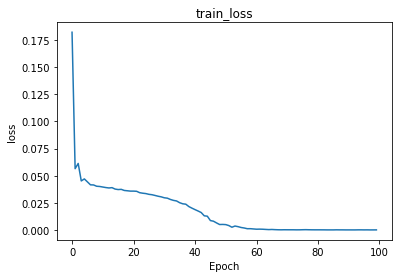

In [15]:
# 使用一層LSTM層，訓練100個epoch，batch_size為16，畫train loss
with tf.device('/gpu:0'):
    history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 16)
    
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot( history.history["loss"])

# 以下使用訓練好的模型分別對訓練以及測試集做預測

In [16]:
# Predict results on training data
pred_train = regressor.predict(X_train)

# Predict esults on test data
pred_test = regressor.predict(X_test)

# 列印出訓練集以及測試集的預測損失值

In [17]:
#Print the last value in the evaluation metrics contained within history file
print('-------------------- Evaluation on Training Data --------------------')
for item in history.history:
    print("Final", item, ":", history.history[item][-1])
print("")

#Evaluate the model on the test data using "evaluate"
print('-------------------- Evaluation on Test Data --------------------')
results = regressor.evaluate(X_test, np.reshape(y_test, (y_test.shape[0],1)))
print("")

-------------------- Evaluation on Training Data --------------------
Final loss : 7.658162212464958e-05
Final mean_squared_error : 7.658162212464958e-05
Final mean_absolute_error : 0.007038293872028589

-------------------- Evaluation on Test Data --------------------
1/1 [==============================] - 0s 875us/step - loss: 1.0547e-04 - mean_squared_error: 1.0547e-04 - mean_absolute_error: 0.0075



# 將上面印出的科學記號的loss值取四捨五入到小數後第四位

In [18]:
print('Training Data Evaluation')
print(round(7.658162212464958e-05, 4))
print(round(7.658162212464958e-05, 4))
print(round(0.007038293872028589, 4))
print('\n')
print('Test Data Evaluation')
print(round(1.0547e-04, 4))
print(round(1.0547e-04, 4))
print(round(0.0075, 4))

Training Data Evaluation
0.0001
0.0001
0.007


Test Data Evaluation
0.0001
0.0001
0.0075


# 上面列印出的結果可以看出，訓練集以及測試集的 MSE 均方誤差是差不多的，而 MAE 平均絕對誤差則有些許差異，測試集明顯比訓練集的損失率多一些些，因為測試集明沒有拿進模型訓練，所以預測結果會比較有較大的差異，損失值自然也會比較高，是非常合理的

## 以下使用matplotlib套件將訓練集利用模型預測出的結果以及實際的值做出可視化圖表

- 紅色的線為實際的值
- 藍色的線為預測的值

## 下圖可以看出，基本上藍線以及紅線基本上都是重合在一起的，代表模型對於訓練集預測出的結果是非常準確的

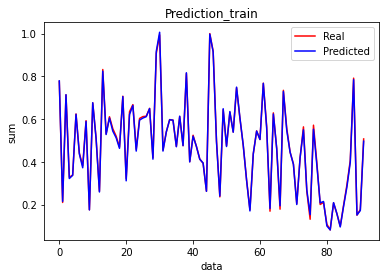

In [19]:
# Visualising pred_train
plt.plot(y_train, color = 'red', label = 'Real')  # train真實
plt.plot(pred_train, color = 'blue', label = 'Predicted')  # train預測
plt.title('Prediction_train')
plt.xlabel('data')
plt.ylabel('sum')
plt.legend()
plt.show()

## 以下使用matplotlib套件將測試集利用模型預測出的結果以及實際的值做出可視化圖表

- 紅色的線為實際的值
- 藍色的線為預測的值

## 下圖可以看出，基本上藍線以及紅線大多重合在一起，少部分會有些許差異，代表模型對於測試集這個沒有訓練的資料預測出的結果有些許的失準，但是差異並沒有到很高，模型基本上還是非常準確的

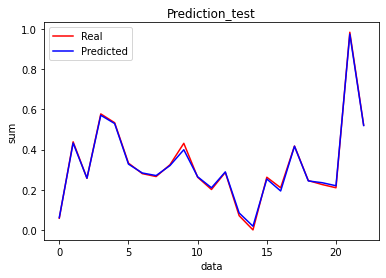

In [20]:
# Visualising pred_test
plt.plot(y_test, color = 'red', label = 'Real')  # test真實
plt.plot(pred_test, color = 'blue', label = 'Predicted')  # test預測
plt.title('Prediction_test')
plt.xlabel('data')
plt.ylabel('sum')
plt.legend()
plt.show()